In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def func(x):
    return 2*m.sin(x)-x**2/10.

In [12]:
def bisection(a,b): 
  
    phi_inv = 1 / ((m.sqrt(5) + 1) / 2)
    
    x1_arr = []
    x2_arr = []
    fx1_arr = []
    fx2_arr = []
    
    while ( abs(b-a)>0.1 ):
        d = (b-a)*phi_inv

        x1= a + d
        x2= b - d

        fx1 = func(x1)
        fx2 = func(x2)
        #print (x1, x2, fx1, fx2)
        x1_arr.append(x1)
        x2_arr.append(x2)
        fx1_arr.append(fx1)
        fx2_arr.append(fx2)
        if fx2> fx1:
            b  = x1
            x1 = x2
        else:
            a  = x2
            x2 = x1
  
    return x1_arr, x2_arr, fx1_arr, fx2_arr

In [13]:
a,b , fa, fb = bisection(0,4)

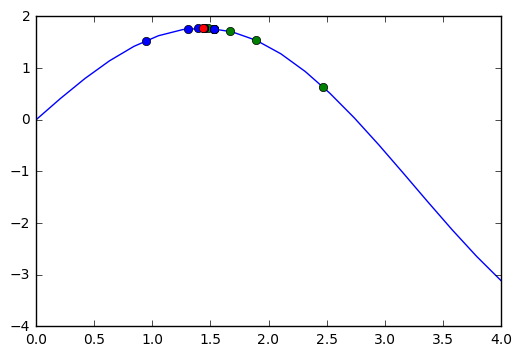

In [19]:
x = np.linspace(0,4, 20)
plt.plot(x, [func(i) for i in x ])
for i,j in zip(a, fa):
    plt.plot(i, j, 'go')
for i,j in zip(b, fb):
    plt.plot(i, j, 'bo')
plt.plot(1.44,1.775, 'ro')

# Newton's

In [29]:
def func(x):
    return 2*m.sin(x)-x**2/10.

def dfunc(x):
    return 2*m.cos(x)-x/5.

def ddfunc(x):
    return -2*m.sin(x)-1/5.

In [36]:
# Function to find the root 
def newtonRaphson( x ): 
    h = dfunc(x) / ddfunc(x) 
    print('position', 'f(x)', 'dfx')

    while abs(dfunc(x)) >= 0.0001: #abs(h) >= 0.0001: 
        h = dfunc(x)/ddfunc(x) 
        
        # Multiple roots
        #h = func(x)*derivFunc(x)/(derivFunc(x)**2 - func(x)*sderivFunc(x) )
        
        
        print('%.4f, %.4f, %.4f'%(x, dfunc(x), ddfunc(x)) )
        
        #x(i+1) = x(i) - f(x) / f'(x) 
        x = x - h 
      
    print("The optimal  is at: ", 
                             "%.4f"% x) 
    return True

In [37]:
newtonRaphson(2.5)

position f(x) dfx
2.5000, -2.1023, -1.3969
0.9951, 0.8899, -1.8776
1.4690, -0.0906, -2.1896
1.4276, -0.0002, -2.1795
The optimal  is at:  1.4276


True

# Direct Methods

In [1]:
def poli(r):
    return -0.18+ 0.0004*r + 250*r**(-2.)

def xi(r, mu=105, sigma=10, A=2.5):
    return poli(r) + A/(sigma*np.sqrt(2*np.pi))*np.exp(-(r - mu)**2/(2*sigma**2))

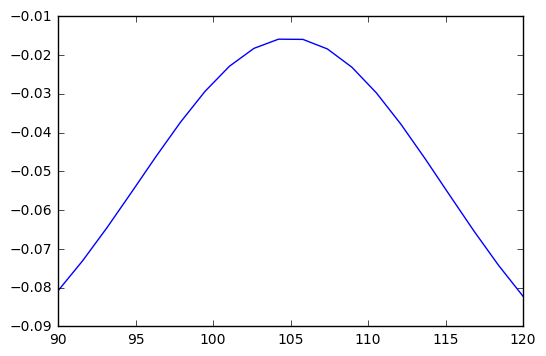

In [4]:
from matplotlib import ticker, cm

x = np.linspace(90, 120, 20)
plt.plot(x, [xi(i) for i in x])

# Multidimensional Optimization

/usr/local/lib/python3.5/site-packages/numpy/ma/core.py:6554: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/site-packages/numpy/ma/core.py:6554: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


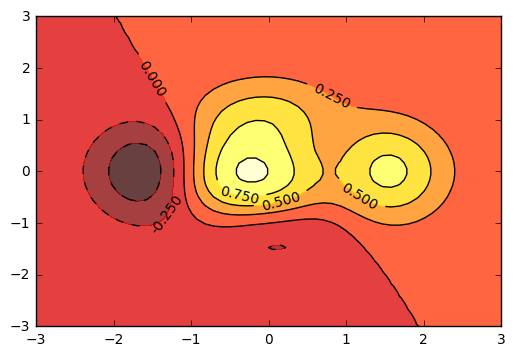

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def f(x,y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)

n = 56
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

#plt.imshow(f(X,Y), interpolation='nearest', cmap='bone', origin='lower')

plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.hot)
C = plt.contour(X, Y, f(X,Y), 8, colors='black', linewidth=.5)
plt.clabel(C, inline=1, fontsize=10)

plt.show()

/usr/local/lib/python3.5/site-packages/numpy/ma/core.py:6554: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/site-packages/numpy/ma/core.py:6554: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


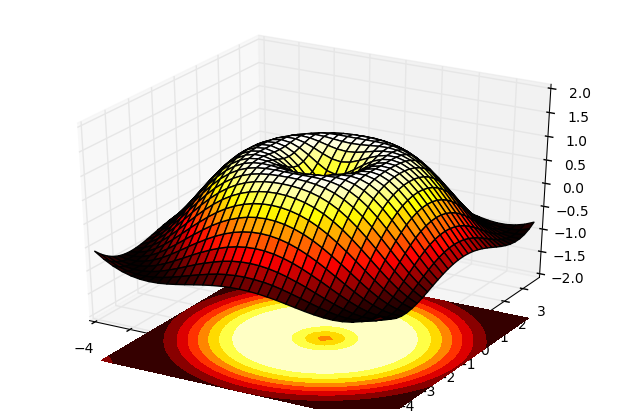

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.contourf(X, Y, Z, zdir='z', offset=-3, cmap=plt.cm.hot)
ax.set_zlim(-2, 2)

plt.show()

# Steepest Descent

step by step

In [8]:
# f(x) = (x-1)^2
# f(x1,x2) = x1^2 + x2^2 - 2x1x2
# f(x1,x2) = x1^2 + 2x2^2 - 5x1
# f(x1,x2,x3) = (x1-2)^2 + (2x2-3)^2 + x3^2
def equation(x):
    return ((x[0] - 1)**2)
    #return x[0]*x[0] + x[1]*x[1] - (2*x[0]*x[1])
    #return x[0]*x[0]+(2*x[1]*x[1])-5*x[0]
    #return (x[0]-2)**2 + (2*x[1]-3)**2 + x[2]**2

In [9]:
# derivation idea is similar to limit derivation
# but h doesnt go 0 it is close to zero
# for high dimensions, we take delf
# which has all derivatives
def derivate(f, X):
    h = 0.0000001
    delf = []
    
    for i in range(len(X)):
        E = np.zeros(len(X))
        E[i] = h
        vals = X + E
        delf.append((f(vals) - f(X))/h)
            
    return delf

def difference(X, Y):
    total = 0
    
    for i in range(len(X)):
        total = total + abs(X[i] - Y[i])
    total = total / len(X)
    return total

In [10]:
phi = (1.0 + m.sqrt(5.0))/2.0

# searches for best learning_rate
# learning_rate is named as val here
# we want to optimize the f(X - L*d) function here where L is learning rate
def golden_section_searcher(X, d, prev_val, lower, upper, epsilon):
    
    x1 = upper - ((phi - 1)*(upper - lower))
    x2 = lower + ((phi - 1)*(upper - lower))
    val = x1
    
    param2 = X - np.dot(x2, d)
    param2 = param2.tolist()
    
    param1 = X - np.dot(x1, d)
    param1 = param1.tolist()
    
    if equation(param2) < equation(param1):
        if x1 > x2:
            upper = x1
        else:
            lower = x1

    else:
        if x2 > x1:
            upper = x2
        else:
            lower = x2

    if abs(prev_val - val) <= epsilon:
        return val
    else:
        return golden_section_searcher(X, d, val, lower, upper, epsilon)

In [11]:
def steepest_descent(X, epsilon):
    
    while True:
        d = derivate(equation, X)
        x_prev = X
        #searching learning rate between [-10,10] is enough
        # learning rate is between 0 and 1 always but lets make it quick and safe one
        learning_rate = golden_section_searcher(X, d, 1, -10, 10, 0.0001)
        X = X - np.dot(learning_rate, d)
        X = X.tolist()
        
        if difference(x_prev, X) < epsilon:
            return x_prev   
    return x_prev

In [12]:
#print(steepest_descent([5,6,7], 0.00001))
print(steepest_descent([5], 0.00001))

[1.0000001867206862]


# In short

In [13]:
import scipy.optimize as sopt

In [14]:
def f(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2 

def df(x):
    return np.array([x[0], 5*x[1]])

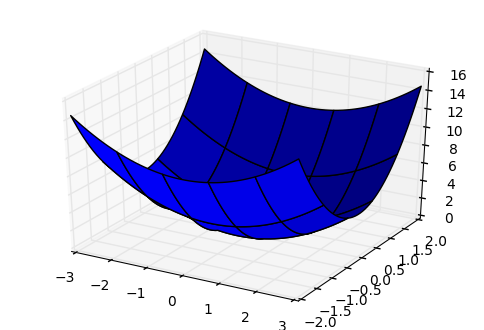

In [15]:
fig = plt.figure()
ax = fig.gca(projection="3d")
xmesh, ymesh = np.mgrid[-3:3:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

/usr/local/lib/python3.5/site-packages/numpy/ma/core.py:6554: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/site-packages/numpy/ma/core.py:6554: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


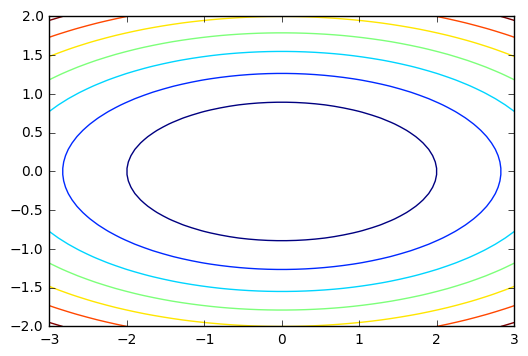

In [16]:
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh)

In [25]:
guesses = [np.array([2, 2.])]

for i in range(10):
    x = guesses[-1]
    s = -df(x)  #derivative

    def f1d(alpha):
        return f(x + alpha*s)

    alpha_opt = sopt.golden(f1d)
    next_guess = x + alpha_opt* s   #rate of convergence
    guesses.append(next_guess)

    print(next_guess)

[ 1.58730159 -0.06349206]
[0.21164018 0.2116402 ]
[ 0.1679684  -0.00671873]
[0.02239578 0.02239578]
[ 0.01777443 -0.00071098]
[0.00236992 0.00236992]
[ 1.88089131e-03 -7.52356369e-05]
[0.00025079 0.00025079]
[ 1.99036044e-04 -7.96143963e-06]
[2.65381269e-05 2.65381345e-05]


/usr/local/lib/python3.5/site-packages/numpy/ma/core.py:6554: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/site-packages/numpy/ma/core.py:6554: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


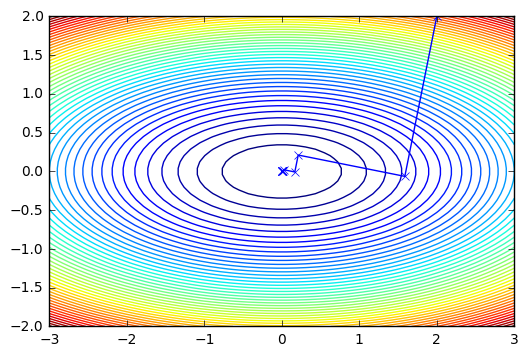

In [26]:
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
plt.plot(it_array.T[0], it_array.T[1], "x-")